In [1]:
import openpyxl as px
import numpy as np
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import datetime
from dateutil.relativedelta import relativedelta
from collections import Counter
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc",size=12)
read_content = pd.read_excel('blue(19000篇).xlsx')

In [7]:
# 星期統計

week = []
time4 = [] #切開時間冒號
for m in time3:
    week.append(m[0])
    if m[2] == "":
        time4.append(m[4].split(":"))
    else:
        time4.append(m[3].split(":"))
time5 = [] #取出小時
for v in time4:
    time5.append(v[0])
    
read_content['time'] = pd.DataFrame(time5)
read_content['week'] = pd.DataFrame(week)
read_content['week'].value_counts()

Thu    480
Fri    459
Mon    444
Tue    431
Wed    422
Sat    415
Sun    402
Name: week, dtype: int64

/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  app.launch_new_instance()
/Users/andy/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:33: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.


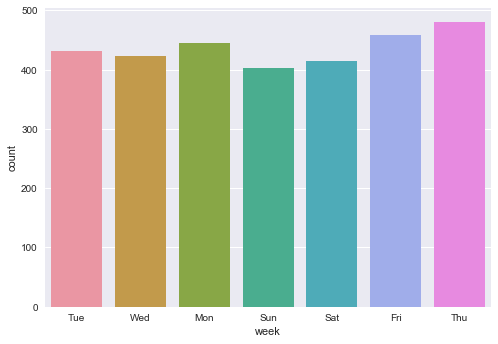

In [5]:
# 作者發文時間統計
author = read_content['作者']
time = read_content['時間'].convert_objects(convert_numeric = True)
mix = list(zip(author,time))

user = ['kid3875215 (銘哥)','angel86015 (小槑)','Astragali (Soldier A)','z881331 (絨毛雞)','s00azure (- 班長 -)','meatkai (凱)','sea212 (sea212)','DavidJam (平安又有錢才是福)','pinpo (孤獨患者)','DavidJam (平安是福)','lickmebaby (Rebirth)','ezk (蒲葵貓)','epoch3004 (木字旁)','yehz (葉子)','fervorya (一丄上止正)','viable (viable)','p1026 (豬)','gossiplarry (賴瑞)','zeze (籠中鳥)','Llingjing (冷劍塵)']

time2 = []
for k in mix:
    for username in user:
        if k[0] == username:
            time2.append(k[1])
        else:
            pass

week = []
time3 = [] #切開日期時間空白
for n in time2:
    time3.append(n.split(" "))
time4 = [] #切開時間冒號
for m in time3:
    week.append(m[0])
    if m[2] == "":
        time4.append(m[4].split(":"))
    else:
        time4.append(m[3].split(":"))
time5 = [] #取出小時
for v in time4:
    time5.append(v[0])
    
read_content['time'] = pd.DataFrame(time5)
read_content['week'] = pd.DataFrame(week)
read_content['time'] = read_content['time'].convert_objects(convert_numeric = True)

#合併時間跟星期
df1 = read_content['time']
df2 = read_content['week']
frames = [df1, df2]
result = pd.concat(frames,axis=1)

#計算兩欄dataframe的資料
result_1 = result.groupby(["time", "week"]).size()
# print(result_1)

# seaborn.countplot(x='time',data=read_content)
seaborn.countplot(x='week',data=read_content)
plt.show()

# x軸為星期,y軸為時間

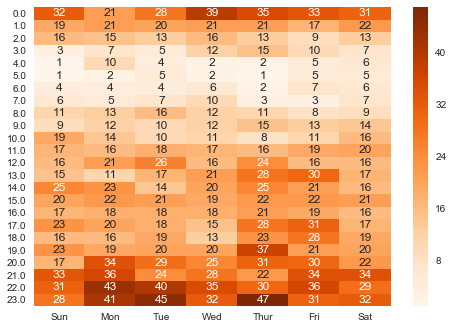

In [3]:
# heatmap

all_counts=[]
week = ['Sun','Mon','Tue','Wed','Thu','Fri','Sat']
# time = ['1.0','']
# subweek=read_content[read_content['week']=='Sunday']
for a in week:
    subweek=read_content[read_content['week']==a]
    all_counts.append(subweek['time'].value_counts().sort_index())
# print(all_counts)



weekday_hour=pd.concat(all_counts,keys=['Sun','Mon','Tue','Wed','Thur','Fri','Sat'],axis=1)
weekday_hour.fillna(0,inplace=True)
# print(weekday_hour)

seaborn.heatmap(weekday_hour, annot=True,cmap="Oranges")
plt.show()

In [6]:
# 取出所有人發文月份
season= read_content['時間'].str.split(" ").str[1]
mix2 = list(zip(author,season))

season2 = []
for l in mix2:
    for username in user:
        if l[0] == username:
            season2.append(l[1])
        else:
            pass
read_content['season'] = pd.DataFrame(season2)

# 各月份發文平均
season3 = read_content['season'].value_counts()
# season3.rename(index={'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12},inplace=True)
# season3 = season3.sort_index()
# season3.plot(kind='bar')
print(season3)
plt.show()

Oct    314
Dec    312
Nov    297
Jul    295
Jun    272
Aug    267
May    266
Sep    265
Jan    262
Apr    185
Mar    172
Feb    146
Name: season, dtype: int64


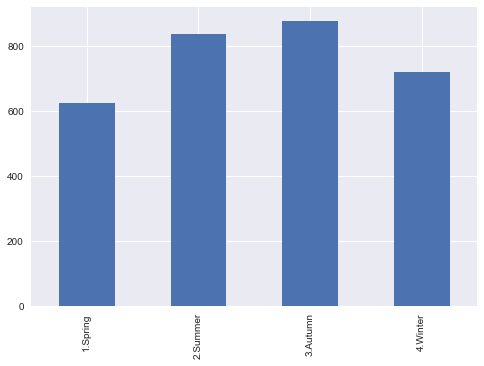

In [5]:
# 切成四季發文平均
read_content['season2'] = read_content['season']
read_content['season2'] = read_content['season2'].str.replace('Jan','4.Winter')
read_content['season2'] = read_content['season2'].str.replace('Feb','4.Winter')
read_content['season2'] = read_content['season2'].str.replace('Mar','1.Spring')
read_content['season2'] = read_content['season2'].str.replace('Apr','1.Spring')
read_content['season2'] = read_content['season2'].str.replace('May','1.Spring')
read_content['season2'] = read_content['season2'].str.replace('Jun','2.Summer')
read_content['season2'] = read_content['season2'].str.replace('Jul','2.Summer')
read_content['season2'] = read_content['season2'].str.replace('Aug','2.Summer')
read_content['season2'] = read_content['season2'].str.replace('Sep','3.Autumn')
read_content['season2'] = read_content['season2'].str.replace('Oct','3.Autumn')
read_content['season2'] = read_content['season2'].str.replace('Nov','3.Autumn')
read_content['season2'] = read_content['season2'].str.replace('Dec','4.Winter')
season2 = read_content['season2'].value_counts()
season2 = season2.sort_index()
season2.plot(kind='bar')
plt.show()